![icon](https://th.bing.com/th/id/OIP.c_p8Fa-MeQ6DONik_FuopQHaFw?w=200&h=180&c=7&r=0&o=5&dpr=1.1&pid=1.7)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/kaggle/input/udemy-courses-revenue-generation-and-course-anal/Entry Level Project Sheet - 3.1-data-sheet-udemy-courses-web-development.csv')

### Get some information about data

In [3]:
df.head()

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,rating,content_duration,published_timestamp,subject,Date,Free/Paid
0,41295,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,0,268923,8629,45,Beginner Level,0.82,10.5,2013-02-14T07:03:41Z,Web Development,2013-02-14,Free
1,59014,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,0,161029,279,27,Expert Level,0.69,3.5,2013-06-09T15:51:55Z,Web Development,2013-06-09,Free
2,625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,200,121584,27445,342,Beginner Level,0.89,43.0,2015-11-02T21:13:27Z,Web Development,2015-11-02,Paid
3,173548,Build Your First Website in 1 Week with HTML5 ...,https://www.udemy.com/build-your-first-website...,0,120291,5924,30,All Levels,0.78,3.0,2014-04-08T16:21:30Z,Web Development,2014-04-08,Free
4,764164,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,200,114512,22412,304,Beginner Level,0.55,30.5,2016-03-08T22:28:36Z,Web Development,2016-03-08,Paid


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3676 entries, 0 to 3675
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3676 non-null   int64  
 1   course_title         3676 non-null   object 
 2   url                  3676 non-null   object 
 3   price                3676 non-null   int64  
 4   num_subscribers      3676 non-null   int64  
 5   num_reviews          3676 non-null   int64  
 6   num_lectures         3676 non-null   int64  
 7   level                3676 non-null   object 
 8   rating               3676 non-null   float64
 9   content_duration     3676 non-null   float64
 10  published_timestamp  3676 non-null   object 
 11  subject              3676 non-null   object 
 12  Date                 3676 non-null   object 
 13  Free/Paid            3676 non-null   object 
dtypes: float64(2), int64(5), object(7)
memory usage: 402.2+ KB


In [5]:
df.sample()

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,rating,content_duration,published_timestamp,subject,Date,Free/Paid
2168,347104,Learn to Play the Oboe: Beginner to Pro in Und...,https://www.udemy.com/oboe-a-beginners-guide/,50,500,39,74,Beginner Level,0.07,5.0,2015-01-01T01:25:25Z,Musical Instruments,2015-01-01,Paid


In [6]:
df.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,rating,content_duration
count,3.676000e+03,3676.000000,3676.000000,3676.000000,3676.000000,3676.000000,3676.000000
mean,6.757535e+05,66.115343,3199.260881,156.309848,40.129761,0.610868,4.096137
std,3.431304e+05,61.056073,9486.582966,935.674518,50.398507,0.334287,6.054948
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.074740e+05,20.000000,112.000000,4.000000,15.000000,0.280000,1.000000
50%,6.876920e+05,45.000000,912.500000,18.000000,25.000000,0.760000,2.000000
75%,9.608140e+05,95.000000,2558.000000,67.000000,46.000000,0.930000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,1.000000,78.500000


## Cleaning data

In [7]:
df.isna().sum()

course_id              0
course_title           0
url                    0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
rating                 0
content_duration       0
published_timestamp    0
subject                0
Date                   0
Free/Paid              0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df[df.duplicated()]

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,rating,content_duration,published_timestamp,subject,Date,Free/Paid


In [10]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3671    False
3672    False
3673    False
3674    False
3675    False
Length: 3676, dtype: bool

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.drop('url',axis=1,inplace=True)

### Convert object to date
#### convert data that on left and but it in the main column

In [13]:
 df ['published_timestamp'] = pd.to_datetime(df ['published_timestamp']).dt.date

In [14]:
df.drop('course_id',axis=1,inplace=True)

In [15]:
df.head()

,course_title,price,num_subscribers,num_reviews,num_lectures,level,rating,content_duration,published_timestamp,subject,Date,Free/Paid
0,Learn HTML5 Programming From Scratch,0,268923,8629,45,Beginner Level,0.82,10.5,2013-02-14,Web Development,2013-02-14,Free
1,Coding for Entrepreneurs Basic,0,161029,279,27,Expert Level,0.69,3.5,2013-06-09,Web Development,2013-06-09,Free
2,The Web Developer Bootcamp,200,121584,27445,342,Beginner Level,0.89,43.0,2015-11-02,Web Development,2015-11-02,Paid
3,Build Your First Website in 1 Week with HTML5 ...,0,120291,5924,30,All Levels,0.78,3.0,2014-04-08,Web Development,2014-04-08,Free
4,The Complete Web Developer Course 2.0,200,114512,22412,304,Beginner Level,0.55,30.5,2016-03-08,Web Development,2016-03-08,Paid


____________
## visualize 
* ### we will start with categorcal data
* ### find relation between columns

Text(0.5, 1.0, 'paid vs free courses')

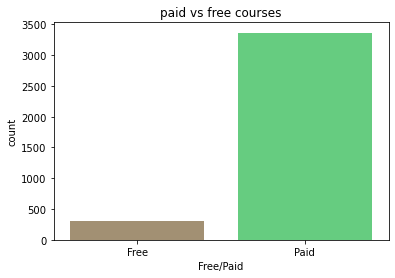

In [16]:
sns.countplot(x='Free/Paid',data=df,palette="terrain_r")
plt.title('paid vs free courses')

In [17]:
df['Free/Paid'].value_counts()

Paid    3365
Free     311
Name: Free/Paid, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Comparison between levels')

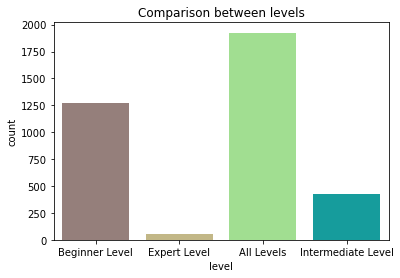

In [18]:
#plt.figure(figsize=(6,5))
sns.countplot('level',data=df,palette="terrain_r")
plt.title('Comparison between levels')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='subject', ylabel='count'>

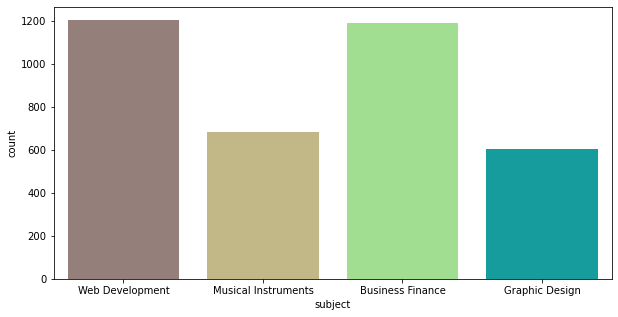

In [19]:
plt.figure(figsize=(10,5))
sns.countplot('subject',data=df,palette="terrain_r")

In [20]:
df['subject'].value_counts()

Web Development        1203
Business Finance       1191
Musical Instruments     680
Graphic Design          602
Name: subject, dtype: int64

### ---> most requirment in courses is Web Development and Business Finance

<AxesSubplot:>

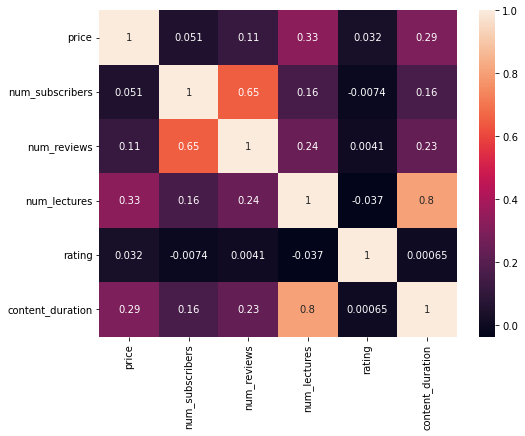

In [21]:
#corr=corrilation in math like relation if it was negative that mean Reverse
#if was possitive that mean Expel
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True)


### subscriber vs price

<AxesSubplot:xlabel='price', ylabel='num_subscribers'>

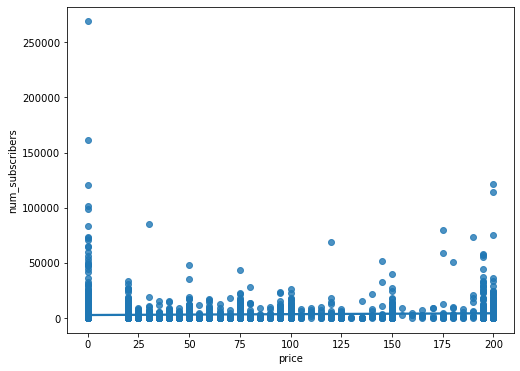

In [22]:
plt.figure(figsize=(8,6))
sns.regplot(x='price',y='num_subscribers',data=df)

<AxesSubplot:xlabel='price', ylabel='num_reviews'>

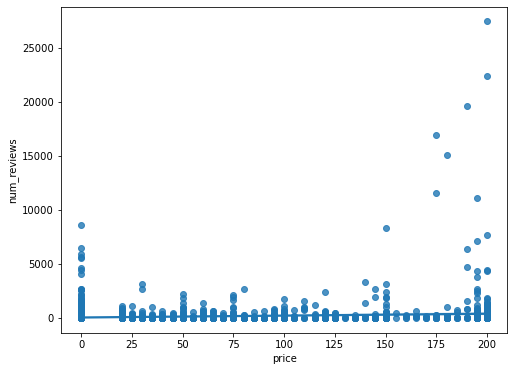

In [23]:
#num_reviews vs price
plt.figure(figsize=(8,6))
sns.regplot(x='price',y='num_reviews',data=df)

<AxesSubplot:xlabel='price', ylabel='content_duration'>

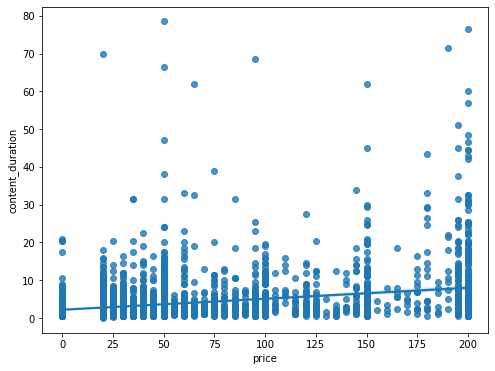

In [24]:
plt.figure(figsize=(8,6))
sns.regplot(x='price',y='content_duration',data=df)

<AxesSubplot:xlabel='num_subscribers', ylabel='content_duration'>

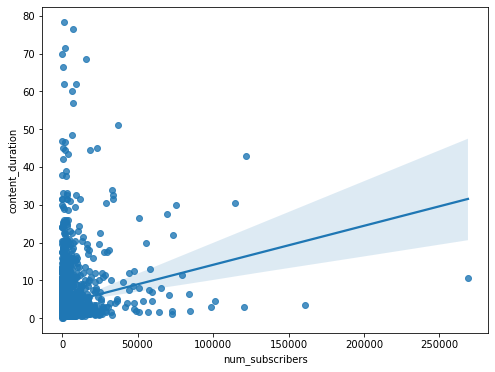

In [25]:
plt.figure(figsize=(8,6))
sns.regplot(x='num_subscribers',y='content_duration',data=df)

### --> contenent duration leads to more subscribers

# Conclusions
#### most of the courses paid
#### most of the courses is for all levels or biginner level
#### price didn't affect on num_reviews
#### subsccriber didn't effict on price
#### content_duration may affect on price

### 